In [119]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("dataset.csv", sep = ';')

In [45]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [47]:
df.shape

(590, 29)

In [50]:
df_minutes_view = df.sort_values(by='G',ascending=True, na_position='first')

In [55]:
df_minutes_view.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
129,Sam Dekker,PF,27,TOR,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,Lindell Wigginton,PG,23,MIL,1,0,5.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
399,Malik Newman,PG,24,CLE,1,0,8.0,3.0,5.0,0.6,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.0
309,Arnoldas Kulboka,SF,24,CHO,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,Luke Kornet,C,26,MIL,1,0,3.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
#Total goal attempt
tot_goal_attempt = df['FGA'] + df['3PA'] + df['2PA']
df.insert(30, 'TGA', tot_goal_attempt)

#Points per minute played
points_by_minutes = df['PTS'] / df['MP']
df.insert(31, 'PTSM', points_by_minutes)

#Total points
total_points = df['PTS'] * df['G']
df.insert(32, 'TPTS', total_points)

In [85]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,TGA,PTSM,TPTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,7.7,1.3,0.6,0.6,1.1,2.2,7.9,16.3,0.312253,268.6
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,9.3,3.0,1.0,0.6,1.6,1.7,6.7,9.8,0.260700,294.8
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,10.0,3.2,1.2,0.5,2.9,3.1,18.7,26.6,0.568389,392.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,2.5,0.5,0.1,0.2,0.3,0.9,3.4,7.5,0.323810,85.0
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,5.7,0.9,0.4,1.1,0.8,1.7,13.8,20.6,0.597403,441.6


In [71]:
minutes_mean = df['MP'].mean()

In [96]:
best_players = df[['Player','Age','Tm','G','MP','PTSM', 'TPTS']]

In [103]:
best_players = best_players.loc[(best_players['MP'] > minutes_mean) & (best_players['G'] > 10)]

In [104]:
best_players_points_minutes = best_players.sort_values(by='PTSM',ascending=False)

In [105]:
best_players_points_minutes

,Player,Age,Tm,G,MP,PTSM,TPTS
11,Giannis Antetokounmpo,27,MIL,39,32.7,0.874618,1115.4
156,Joel Embiid,27,PHI,34,32.9,0.863222,965.6
149,Kevin Durant,33,BRK,36,36.5,0.802740,1054.8
586,Trae Young,23,ATL,41,34.8,0.801724,1143.9
265,LeBron James,37,LAL,34,36.6,0.789617,982.6
...,...,...,...,...,...,...,...
211,Maurice Harkless,28,SAC,30,18.4,0.217391,120.0
254,Andre Iguodala,38,GSW,25,20.5,0.204878,105.0
182,Taj Gibson,36,NYK,29,19.1,0.193717,107.3
16,Trevor Ariza,36,LAL,12,19.2,0.192708,44.4


In [106]:
best_players_points_total = best_players.sort_values(by='TPTS',ascending=False)

In [107]:
best_players_points_total

,Player,Age,Tm,G,MP,PTSM,TPTS
586,Trae Young,23,ATL,41,34.8,0.801724,1143.9
11,Giannis Antetokounmpo,27,MIL,39,32.7,0.874618,1115.4
122,Stephen Curry,33,GSW,42,34.7,0.757925,1104.6
513,Jayson Tatum,23,BOS,43,36.8,0.684783,1083.6
130,DeMar DeRozan,32,CHI,41,34.8,0.747126,1066.0
...,...,...,...,...,...,...,...
144,PJ Dozier,25,DEN,18,18.9,0.285714,97.2
511,Keifer Sykes,28,IND,11,22.2,0.351351,85.8
279,Stanley Johnson,25,LAL,12,20.5,0.321951,79.2
402,Nerlens Noel,27,NYK,18,23.0,0.152174,63.0


In [110]:
best_teams = best_players_points_minutes.groupby(['Tm']).mean()

In [112]:
best_teams = best_teams[['PTSM']].sort_values(by=['PTSM'],ascending=False)

In [113]:
best_teams.rename(columns= {"PTSM" : "Points per minutes"})

,Points per minutes
Tm,
MEM,0.491776
UTA,0.488111
MIL,0.486429
ATL,0.481344
SAS,0.478731
POR,0.477954
CHO,0.475532
MIA,0.471582
PHO,0.470775


In [116]:
timeUFuncs = %timeit -o df['PTS'] / df['MP']
timeUFuncs.average

52.3 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


5.227886428567997e-05

In [117]:
def forLoopFunc():
    points_by_minutes = {}
    for index, row in df.iterrows():
        points_by_minutes[index] = row['PTS'] / row['MP']
        
timeForLoop = %timeit -o forLoopFunc()
timeForLoop.average

17.3 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.017294746571426784

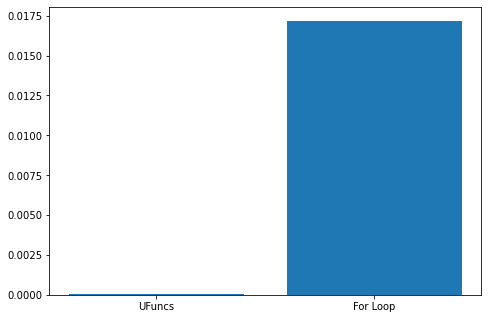

In [120]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['UFuncs','For Loop']
results = [timeUFuncs.best, timeForLoop.best]
ax.bar(methods,results)
plt.show()